In [8]:
import dd
from getsig import getsig
import matplotlib.pyplot as plt
from scipy.signal import medfilt
plt.style.use('helvet')

In [3]:
shotnr = 30733

In [5]:
dne1 = getsig(shotnr, 'DNE', 'neDdel_1', exper='mcavedon')
dne2 = getsig(shotnr, 'DNE', 'neDdel_2', exper='mcavedon')

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


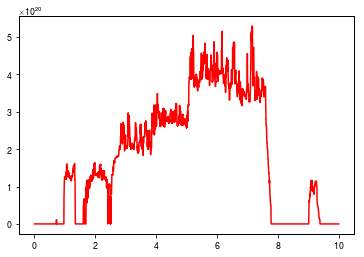

In [14]:
plt.plot(dne1.time, medfilt(dne1.data[:,0],21))
plt.show()

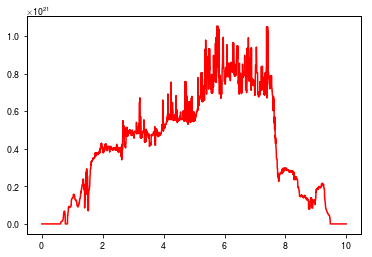

In [12]:
plt.plot(dne2.time, medfilt(dne2.data[:,19], 21))
plt.show()

# Probe filtering for \#30733

In [15]:
shotnr = 30733

In [17]:
tea = getsig(shotnr, 'LSD', 'te-ua3')
tei = getsig(shotnr, 'LSD', 'te-ui5')

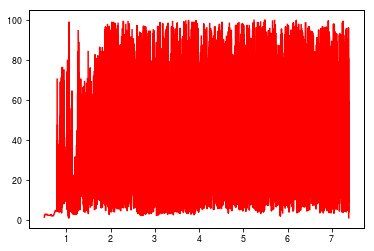

In [20]:
plt.plot(tea.time, medfilt(tea.data, 451))
plt.show()

In [21]:
import dd
from scipy.signal import medfilt

In [25]:
rdl = dd.shotfile('RDL', 31128)
lfsr = rdl('LFSR')
hfsr = rdl('HFSR')
dens = rdl.getParameterSet('Aux','ne')
rdl.close()

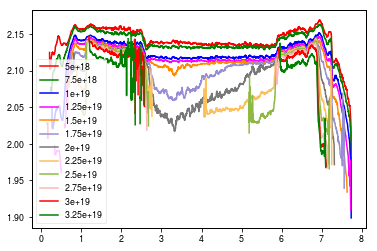

In [38]:
for i,j in zip(dens['ne'].data, range(len(dens['ne'].data))):
    plt.plot(lfsr.time, medfilt(lfsr.data[:,j],51), label=i)
plt.legend()
plt.show()

In [29]:
dens['ne'].data

array([5.00e+18, 7.50e+18, 1.00e+19, 1.25e+19, 1.50e+19, 1.75e+19,
       2.00e+19, 2.25e+19, 2.50e+19, 2.75e+19, 3.00e+19, 3.25e+19],
      dtype=float32)

In [33]:
range(len(dens['ne'].data))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [37]:
for i in dens['ne'].data:
    print i

5e+18
7.5e+18
1e+19
1.25e+19
1.5e+19
1.75e+19
2e+19
2.25e+19
2.5e+19
2.75e+19
3e+19
3.25e+19


# Getting jsat from LSD

In [36]:
import dd
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as scc
from smoothAm import smoothAm
from scipy.signal import medfilt
from scipy.signal import detrend
plt.style.use('helvet2')

In [41]:
def read_jsat(shotnr, probename):
    lsd = dd.shotfile('LSD', shotnr)
    ne = lsd('ne-'+probename)
    te = lsd('te-'+probename)
    angle = lsd('ang-'+probename)
    lsd.close()    
    jsat = scc.e * ne.data * np.power((4.0*scc.e*te.data)/(2.0*1.672e-27), 0.5) * np.sin(scc.pi/180.0 * angle.data)
    msk = ~np.isnan(jsat)
    return ne.time[msk], jsat[msk]

In [42]:
#jsatt, jsat = read_jsat(30733, 'ua6')
jsatt, jsat = read_jsat(34066, 'ua6')

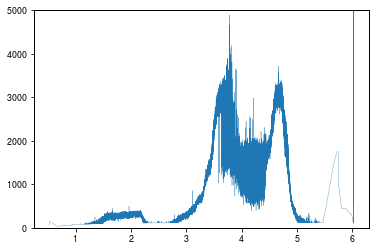

In [47]:
plt.plot(jsatt, medfilt(jsat,3),lw=0.3)
plt.ylim(0,5e3)
plt.show()

In [25]:
scc.e

1.6021766208e-19

In [48]:
ua3 = np.loadtxt('SupportFiles/LSF.ua3')

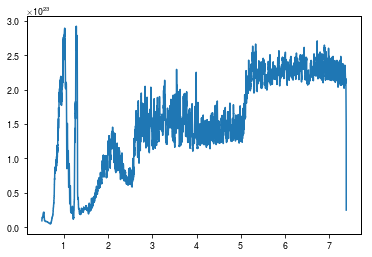

In [54]:
plt.plot(ua3[:,0],medfilt(ua3[:,1],451))
plt.show()

In [55]:
ui5 = np.loadtxt('SupportFiles/LSF.ui5')

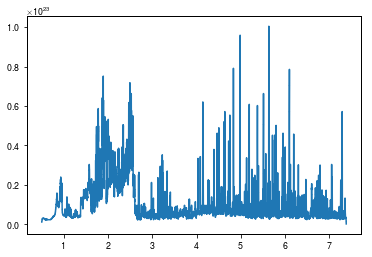

In [56]:
plt.plot(ui5[:,0],medfilt(ui5[:,1],451))
plt.show()

# Getting the PED shotfile

In [57]:
shotnr = 30554
ped = dd.shotfile('PED', shotnr, experiment='guimas', edition=1)

In [58]:
nedata = ped('neData')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


#### Remove zeros

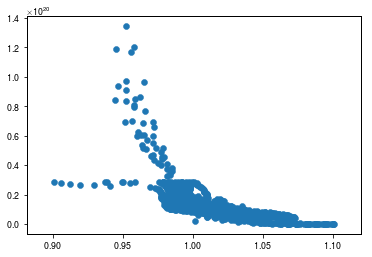

In [84]:
mskz = nedata.data!=0.0
rhos = nedata.area.data[0,mskz]
dens = nedata.data[mskz]
plt.scatter(rhos,dens)
plt.show()

In [71]:
diagind = ped('DiagIndx')

In [89]:
nedpts = ped('neDPts')

In [99]:
indexesr = nedpts.data[nedpts.data!=0]
indexesr

array([  41.,  167., 1426.], dtype=float32)

In [152]:
indi = np.array([0, 41, 41+167])
indf = np.array([41-1, 41+167-1, 41+167+1426-1])
zorder = np.array([3,2,1])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS']
clrs = ['p','g','b']

#### Convert rho to Major Radius

In [125]:
import kk_abock
eq = kk_abock.kk()
eq.Open(30554, diag='EQH')

True

In [144]:
radius = eq.rhopol_to_Rz(3.0, rhos, 0.0)
rad = radius['R']

In [157]:
msk = (rad<2.13)&(dens<3.1e19)

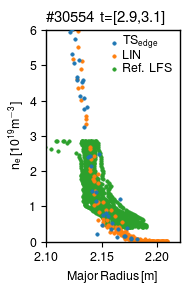

In [179]:
plt.figure(figsize=(2,3), dpi=100)
for a,b,c,d,clr in zip(indi, indf, zorder,labels,clrs):
    plt.scatter(rad[a:b],dens[a:b]*1e-19,s=6,zorder=c,label=d)

plt.xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
plt.ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
plt.ylim(0,6)
plt.xlim(2.10,2.22)
plt.title('\#30554 t=[2.9,3.1]', loc='left')
plt.legend(loc='upper right',borderpad=0.,frameon=False,handletextpad=-0.3,labelspacing=0)
plt.xticks([2.10,2.15,2.20])
plt.tight_layout()
plt.show()

In [104]:
print(len(rhos))

1634


In [137]:
radius['R']

array([2.1711884, 2.1729412, 2.1760573, 2.1815403, 2.1536999, 2.1555707,
       2.1588979, 2.1647294, 2.139194 , 2.1411757, 2.144687 , 2.150674 ,
       2.1281176, 2.1302142, 2.1339328, 2.1404212, 2.1214561, 2.1236405,
       2.1275144, 2.1342683, 2.119702 , 2.1219413, 2.125909 , 2.1328192,
       2.1231098, 2.1253626, 2.1293526, 2.136296 , 2.131867 , 2.1340854,
       2.1380143, 2.144832 , 2.145608 , 2.1477563, 2.1515708, 2.1582375,
       2.1641064, 2.1661956, 2.16991  , 2.176413 , 2.1889293, 2.2081957,
       2.2083714, 2.2079823, 2.2050261, 2.206963 , 2.2084718, 2.2082646,
       2.2038877, 2.2040632, 2.2036746, 2.2007227, 2.202657 , 2.2041638,
       2.2058103, 2.2049203, 2.2039566, 2.1996207, 2.199796 , 2.1994083,
       2.1964493, 2.198392 , 2.1998966, 2.2015324, 2.2006454, 2.1996896,
       2.1954477, 2.1956222, 2.1952355, 2.1922944, 2.1942213, 2.1957223,
       2.1973543, 2.1964695, 2.1955159, 2.1905675, 2.1907423, 2.190356 ,
       2.1874206, 2.1893437, 2.190842 , 2.1924708, 